In [6]:
import pandas as pd
import seaborn as sns

In [8]:
df =pd.read_csv('hpv_clean_w_err.csv', index_col=0)
df.columns = ['State', *df.columns[1:]]
df.head()

,State,gte1_Tdap_pct,gte1_MenACWY,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_Tdap_pct_err,gte1_MenACWY_err,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err
0,Connecticut,93.7,93.5,70.9,64.3,55.2,65.3,58.2,42.0,3.0,3.1,8.2,8.7,9.1,7.8,8.1,8.3
1,Maine,87.7,77.7,66.0,53.9,44.1,65.8,58.7,46.7,4.0,5.3,8.3,8.7,8.6,7.9,8.3,8.4
2,Massachusetts,91.2,89.5,73.5,63.0,52.8,63.0,50.9,35.2,4.1,4.4,8.6,9.5,9.7,8.8,9.1,8.5
3,New Hampshire,92.4,87.7,74.2,59.7,51.4,69.8,55.1,47.1,3.9,4.4,8.8,10.0,10.0,7.9,9.0,9.1
4,Rhode Island,97.1,97.7,87.9,77.9,68.0,80.6,66.6,58.1,1.6,1.5,4.9,6.7,7.4,5.8,7.1,7.4


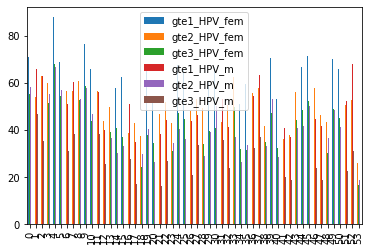

In [78]:
df.iloc[:,3:9].plot.bar()

In [79]:
values = df.melt(id_vars='State', value_vars=[*df.columns[3:9]], value_name='proportion')
vidx = pd.MultiIndex.from_tuples(list(zip(values.State, values.variable)))
values = pd.DataFrame(values.set_index(vidx)['proportion'])
#values = pd.DataFrame(values.proportion, index=vidx)
errors = df.melt(id_vars='State', value_vars=[*df.columns[11:]], value_name='error')
eidx = pd.MultiIndex.from_tuples(list(zip(errors.State, errors.variable))) 
errors = pd.DataFrame(errors.set_index(eidx)['error'])
errors.index = [(a, "_".join(b.split('_')[:3])) for a,b in errors.index]
#values
values['error'] = [errors.T[i].error for i in values.index]
values['State'] = [a for a,b in values.index]
values['vaccine'] = [b for a,b in values.index]
values['sex'] = [b.split('_')[-1] for b in values.vaccine]
values.loc[:,['State', 'vaccine', 'proportion', 'error']].to_csv('hpv_melt.csv', index=False)

In [36]:
len(set([*values.index, *errors.index]))

324

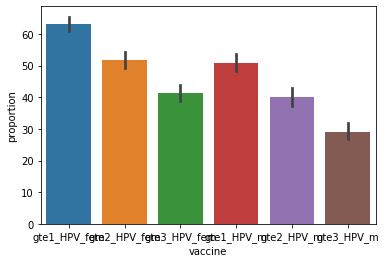

In [77]:
sns.barplot(x=values.vaccine, y=values.proportion)

In [67]:
# Reference: https://stackoverflow.com/questions/42017049/seaborn-how-to-add-error-bars-on-a-grouped-barplot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def grouped_barplot(df, cat,subcat, val , err):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{} {}".format(subcat, gr), yerr=dfg[err].values)
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.legend()
    plt.show()


In [15]:
hpv = df.iloc[:,3:9]
hpv['Average'] = df.mean(axis=1)
dict(zip(hpv.index, hpv.Average))

/Users/simonelongo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{'Connecticut': 37.462500000000006,
 'Maine': 35.00625,
 'Massachusetts': 36.362500000000004,
 'New Hampshire': 37.53124999999999,
 'Rhode Island': 42.268750000000004,
 'Vermont': 36.33124999999999,
 'New Jersey': 33.387499999999996,
 'New York': 33.28125,
 'Delaware': 35.90624999999999,
 'District of Columbia': 37.868750000000006,
 'Maryland': 33.887499999999996,
 'Pennsylvania': 34.0125,
 'Virginia': 29.2375,
 'West Virginia': 30.65625000000001,
 'Alabama': 29.2625,
 'Florida': 29.10625,
 'Georgia': 30.21875,
 'Kentucky': 27.118750000000002,
 'Mississippi': 24.556250000000002,
 'North Carolina': 31.643750000000004,
 'South Carolina': 26.375,
 'Tennessee': 27.693749999999998,
 'Illinois': 29.400000000000006,
 'Indiana': 29.6,
 'Michigan': 32.493750000000006,
 'Minnesota': 31.8625,
 'Ohio': 29.3875,
 'Wisconsin': 31.987500000000004,
 'Arkansas': 28.99374999999999,
 'Louisiana': 31.89375,
 'New Mexico': 32.712500000000006,
 'Oklahoma': 30.118749999999995,
 'Texas': 28.593749999999996,
 

In [16]:
#Ref: https://stackoverflow.com/questions/39742305/how-to-use-basemap-python-to-plot-us-with-50-states

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = dict(zip(hpv.index, hpv.Average))
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling State Polygons by Population Density')
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'